### Project Overview

In this project,Data of insurance from Kaggle.com is chosen as the dataset to be analyzed and understand the following questions

### Problem Statement 

my strategy i did describe the data and saw statistics like mean , max , min ...etc .After that i make some questions and see the results by visualization  

Q1 How many Female they have a children ?

Q2 How many Male they have a children ?

Q3 Compare Sex Vs Charges

Q4 Compare Sex Vs Charges

Q5 Compare Sex (Male VS Female )

Q6 Male VS Region

Q7 Female VS Region

Q8 Female VS Smoker

Q9 Male VS Smoker

### Data Preprocessing steps 

1/ project overview 

2/ problem statement

3/ load data 

4/ Metrics

5/ Data Exploration

6/ Data Exploration & Visualization

7/ Implementation

8/ Model Evaluation and Validation

9/ conclusion


### Metrics

i did  use model RandomForestRegressor , r2_score , StandardScaler and LabelEncoder to calculator r2 score ,RMSE and MSE also i  used reuslt to describe data by Visualization i use heatmap , bar chart and pie chart to Visualization the data and answer my questions

# Import libraries


In [40]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import pi
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


###  Data Understanding

In [41]:
# load data
df=pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Exploration & Data Preprocessing

i did to check if have any missing value or duplicated and solve it


In [42]:
#check if have null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


There no missing value

In [43]:
#describe data 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


as we see on age the min 18 old  and the max 64 old , also the age of the mean 39 old 

In [44]:
#check if have a duplicated
df.duplicated().sum()

1

In [45]:
#remove duplicated
df.drop_duplicates(inplace = True)

In [46]:
#check if have a duplicated
df.duplicated().sum()

0

there have a duplicated one and they reomved 

# Data visualization

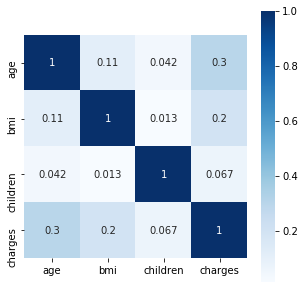

In [47]:
features_corr = df[['age','sex', 'bmi', 'children', 'smoker','region',
       'charges']]
features_correlation = features_corr.corr()
plt.figure(figsize=(5,5))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

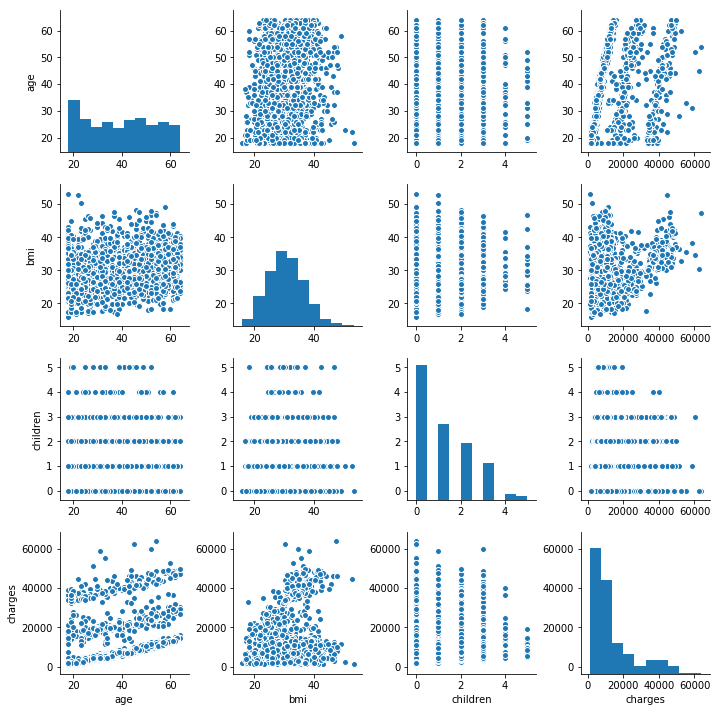

In [48]:
sns.pairplot(df)

### Implementation

 i did  use model RandomForestRegressor , r2_score , StandardScaler and LabelEncoder to calculator r2 score ,RMSE and MSE . also i  use model to  reuslt to describe data by Visualization i use heatmap , bar chart and pie chart to Visualization the data and answer my questions

In [70]:
# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
df['sex'] = le.fit_transform(df['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
df['smoker'] = le.fit_transform(df['smoker'])

In [71]:
# splitting the dependent and independent variable

x = df.iloc[:,:4]
y = df.iloc[:,4]

print(x.shape)
print(y.shape)

(1337, 4)
(1337,)


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 4)
(268, 4)
(1069,)
(268,)


In [73]:
# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [74]:
pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [75]:
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 0.184170047334
RMSE : 0.429150378461
r2 score : -0.0356897494272


### Model Evaluation and Validation

# Q1 How many Female they have a children ? 

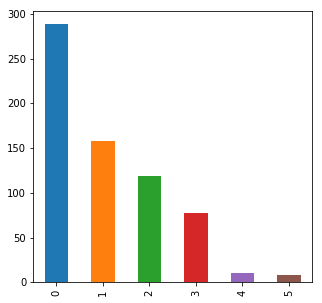

In [49]:
F_children=df['children'][df['sex']=='female']
F_num=F_children.value_counts()
F_num.plot.bar()

as we see most Females they no have childern 

# Q2 How many Male  they have a children ? 

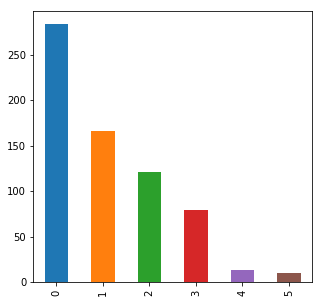

In [50]:
M_children=df['children'][df['sex']=='male']
M_num=M_children.value_counts()
M_num.plot.bar()

as we see most Males  they no have childern 

# Q3 Compare Sex Vs Charges

Text(0.5,1,'Age vs Charges')

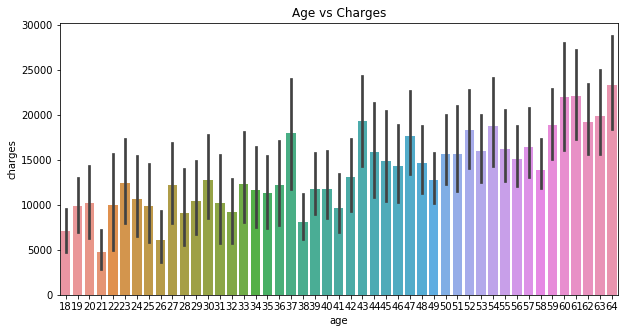

In [51]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'age', y = 'charges', data = df)

plt.title("Age vs Charges")

# Q4 Compare Sex Vs Charges 

Text(0.5,1,'sex vs charges')

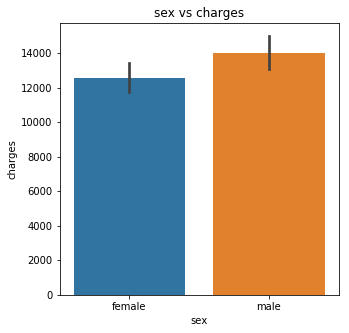

In [52]:
plt.figure(figsize = (5, 5))
sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

as we see most Females have high then males in charges 

# Q5  Compare Sex (Male VS Female )

In [53]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

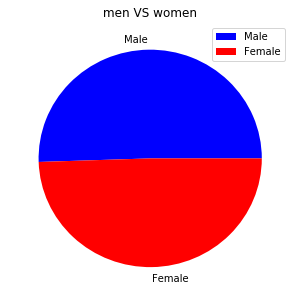

In [54]:
size = [676, 662]
colors = ['blue', 'red']
labels = "Male", "Female"
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels)
plt.title(' men VS women ')
plt.legend()
plt.show()

as we see numbers of Female greater than males

# Q6 Male VS Region

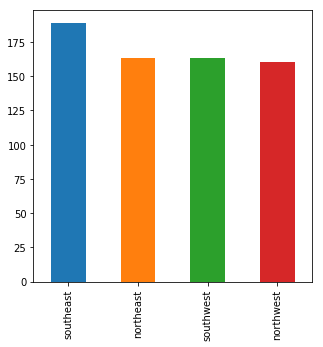

In [55]:
M_region=df['region'][df['sex']=='male']
M_num=M_region.value_counts()
M_num.plot.bar()

as we see most males live in southeast 

#  Q7 Female VS Region

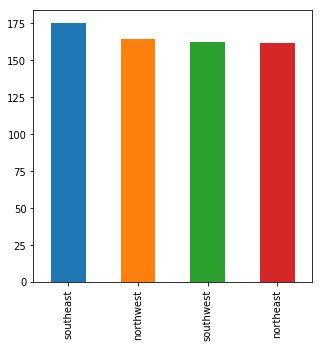

In [56]:
F_region=df['region'][df['sex']=='female']
F_num=F_region.value_counts()
F_num.plot.bar()

as we see most Females live in southeast 

# Q8 Female VS Smoker 

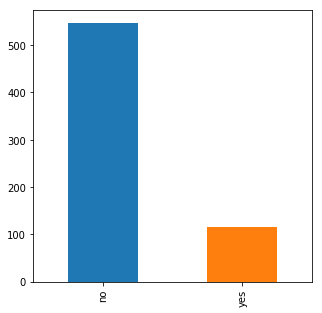

In [57]:
F_smoker=df['smoker'][df['sex']=='female']
F_num=F_smoker.value_counts()
F_num.plot.bar()

as we see most Female no smoker 

# Q9 Male VS Smoker 

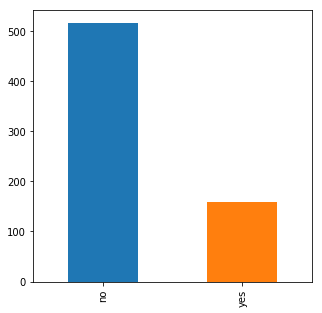

In [58]:
M_smoker=df['smoker'][df['sex']=='male']
M_num=M_smoker.value_counts()
M_num.plot.bar()

as we see most male no smoker 

# conclusion

# i  use model RandomForestRegressor , r2_score , StandardScaler and LabelEncoder to calculator r2 score ,RMSE and MSE  , also  i use techniques of statistics and visualization to describe data so i didn't find a problem so  i found this reuslt :


# 1/ most Females and Males they no have children, number of female have no children 289 and Males 285 

# 2/ most males have high Charges approximately 14000 .

# 3/ Number of males highest then Female on data, Female 665 and males 675

# 4/ Both Males and Females live in Southeast.

# 5/ Both Males and Females no Smoker.

# 6 / the Results of model  
MSE : 0.184170047334
RMSE : 0.429150378461
r2 score : -0.0356897494272


# my suggestion

# better  if the data have more information about males and females have any dieases to do correlation between  charges and dieases